In [1]:
import cv2
import json
import matplotlib.pyplot as plt
import tqdm

In [39]:
with open('/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_coco/annotations/train_annotations.coco.json') as f:
    data = json.load(f)


# with open('/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_coco/annotations/train_annotations.coco.json') as f:
#     data = json.load(f)

In [40]:
anns = data['annotations']
imgs = data['images']


In [41]:
for i in imgs:
    if i['id'] == 228:
        print(i)


{'id': 228, 'license': 1, 'file_name': '160_jpg.rf.cc82ea8541c6e4e0117323204214f130.jpg', 'height': 320, 'width': 320, 'date_captured': '2023-09-26T21:48:00+00:00'}


In [50]:
for ann in anns:
    if ann['category_id'] ==29:
        print(ann['image_id'])

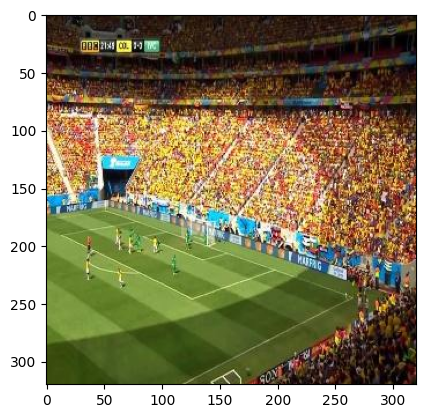

In [43]:
filename = "160_jpg.rf.cc82ea8541c6e4e0117323204214f130.jpg"
filename_path  = "/home/fer/Escritorio/futstatistics/datasets/dataset6_keypoints/dataset6_keypoints_YOLOV5/train/images/" + filename

img = cv2.cvtColor(cv2.imread(filename_path), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [44]:
img_id = [row['id'] for row in imgs if row['file_name'] == filename][0]
img_id

228

In [45]:
anns_0 = [ann for ann in anns if ann['image_id'] == img_id]
print(anns_0)

[{'id': 1584, 'image_id': 228, 'category_id': 22, 'bbox': [82, 224, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1585, 'image_id': 228, 'category_id': 21, 'bbox': [41, 204, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1586, 'image_id': 228, 'category_id': 16, 'bbox': [264, 244, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1587, 'image_id': 228, 'category_id': 15, 'bbox': [127, 247, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1588, 'image_id': 228, 'category_id': 14, 'bbox': [197, 221, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1589, 'image_id': 228, 'category_id': 12, 'bbox': [136, 212, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1590, 'image_id': 228, 'category_id': 11, 'bbox': [156, 206, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1591, 'image_id': 228, 'category_id': 10, 'bbox': [85, 192, 0, 0], 'area': 0, 'segmentation': [], 'iscrowd': 0}, {'id': 1592, 'image_id': 228, 'cat

22
21
16
15
14
12
11
10
9
8
7
6


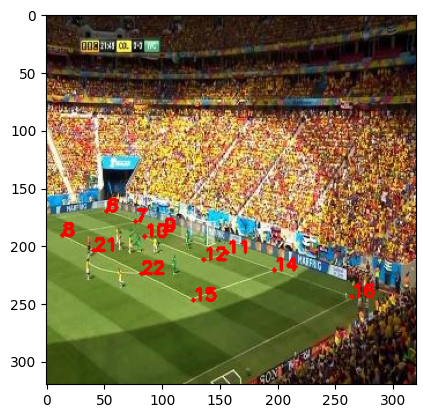

In [46]:
image_ann = img.copy()

for ann in anns_0:
    bbox = ann['bbox']
    top_left = (bbox[0], bbox[1])
    bottom_right = (bbox[0] + bbox[2], bbox[1] + bbox[3])
    center_x = int((bottom_right[0] + top_left[0]) / 2)
    center_y = int((bottom_right[1] + top_left[1]) / 2)

    # Store the calculated values in a tuple to represent the center of the box
    center = (center_x, center_y)
    # print(f'BBOX: {bbox}')
    image_ann = cv2.circle(image_ann, center, 2, (255, 0, 0), -1)
    image_ann = cv2.putText(image_ann, str(ann['category_id']), (bbox[0], bbox[1]), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0),2)

    print(str(ann['category_id']))
    # print(f"P1 : {(bbox[0] - 10 , bbox[1] - 10)}")
    # print(f"P2 : {(bbox[0] + 10, bbox[1] + 10)}")
    # print("-------------------------------------")

plt.imshow(image_ann)